<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-12-13 07:24:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2020-12-13 07:24:29 (306 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  anaconda
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    _pytorch_select-0.1        |            cpu_0           2 KB  anaconda
    absl-py-0.10.0             |           py37_0         169 KB  anaconda
    aiohttp-3.6.3              |   py37h7b6447c_0         626 KB  anaconda
    argon2-cffi-20.1.0         |   py37h7b6447c_1         

ptyprocess-0.6.0     | 23 KB     | ##################################### | 100% 
cycler-0.10.0        | 13 KB     | ##################################### | 100% 
pcre-8.44            | 269 KB    | ##################################### | 100% 
s3transfer-0.3.3     | 90 KB     | ##################################### | 100% 
openssl-1.1.1h       | 3.8 MB    | ##################################### | 100% 
decorator-4.4.2      | 14 KB     | ##################################### | 100% 
unixodbc-2.3.9       | 299 KB    | ##################################### | 100% 
pyparsing-2.4.7      | 64 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pyparsing-2.4.7-py_0/site-packages/pyparsing-2.4.7.dist-info/METADATA.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or renam

bzip2-1.0.8          | 105 KB    | ##################################### | 100% 
jmespath-0.10.0      | 22 KB     | ##################################### | 100% 
more-itertools-8.5.0 | 42 KB     | ##################################### | 100% 
cytoolz-0.11.0       | 367 KB    | ##################################### | 100% 
blosc-1.19.0         | 81 KB     | ##################################### | 100% 
grpcio-1.31.0        | 2.2 MB    | ##################################### | 100% 
async_generator-1.10 | 38 KB     | ##################################### | 100% 
scikit-learn-0.23.2  | 6.9 MB    | ##################################### | 100% 
blas-1.0             | 6 KB      | ##################################### | 100% 
gst-plugins-base-1.1 | 6.3 MB    | ##################################### | 100% 
pip-20.2.4           | 2.0 MB    | ##################################### | 100% 
backcall-0.2.0       | 14 KB     | ##################################### | 100% 
dill-0.3.2           | 65 KB

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/defusedxml-0.6.0-py_0/info/recipe/recipe_log.txt.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/defusedxml-0.6.0-py_0/info/recipe/conda_build_config.yaml.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/defusedxml-0.6.0-py_0/info/recipe/meta.yaml.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/defusedxml-0.6.0-py_0/info/recipe/meta.yaml.template.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.dele

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/dmd-24.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d211-7b.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d577-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/datapoint.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/atari-old.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/addsvp60.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/adm3.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/att5420_2.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/ntconsole-50.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/nwe501.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/ncr160wy60wpp.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/news-33-sjis.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.d

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wy120-w-vb.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse99gt-25-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse325-wvb.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wy150-25.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.de

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/pcmw.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/prism9-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/p12.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/p/putty+fnkeys+xterm.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unli

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/7/730MTGr.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/7/730MTG-41.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/7/730MTG-41r.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/7/730MTGr-24.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:u

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/dialogue.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/diablo630.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d217-unix.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/d/d214-dg.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unli

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/appleII.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/att730r.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/att4418-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/a/aaa-unk.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/news-33-euc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/nec5520.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/ncr160vt300pp.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/n/ncrvt100an.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.del

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wy60-43-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wy185-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wyse160-42.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/w/wy160-25-w.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:u

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/z/z29a-kc-uc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/z/z8001.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/z/zen8001.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/ncurses-6.2-he6710b0_1/share/terminfo/z/zt-1.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_r

numexpr-2.7.1        | 197 KB    | ##################################### | 100% 
tqdm-4.50.2          | 55 KB     | ##################################### | 100% 
sympy-1.6.2          | 10.5 MB   | ##################################### | 100% 
requests-2.24.0      | 54 KB     | ##################################### | 100% 
dbus-1.13.18         | 586 KB    | ##################################### | 100% 
lcms2-2.11           | 419 KB    | ##################################### | 100% 
ld_impl_linux-64-2.3 | 645 KB    | ##################################### | 100% 
markupsafe-1.1.1     | 26 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/markupsafe-1.1.1-py37h14c3975_1/lib/python3.7/site-packages/MarkupSafe-1.1.1.dist-info/METADATA.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140):

yarl-1.6.2           | 139 KB    | ##################################### | 100% 
ca-certificates-2020 | 128 KB    | ##################################### | 100% 
toolz-0.11.1         | 47 KB     | ##################################### | 100% 
opt_einsum-3.1.0     | 54 KB     | ##################################### | 100% 
tensorboard-2.1.0    | 3.4 MB    | ##################################### | 100% 
jinja2-2.11.2        | 97 KB     | ##################################### | 100% 
keras-applications-1 | 30 KB     | ##################################### | 100% 
expat-2.2.10         | 192 KB    | ##################################### | 100% 
pywavelets-1.1.1     | 4.4 MB    | ##################################### | 100% 
imageio-2.9.0        | 3.1 MB    | ##################################### | 100% 
chardet-3.0.4        | 173 KB    | ##################################### | 100% 
xlrd-1.2.0           | 186 KB    | ##################################### | 100% 
pandas-1.1.3         | 10.5 

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/etc/fonts/conf.d/51-local.conf.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/etc/fonts/conf.d/49-sansserif.conf.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/etc/fonts/conf.d/90-synthetic.conf.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/fontconfig-2.13.0-h9420a91_0/etc/fonts/conf.d/10-hinting-slight.conf.  Please remove this file manually (you may need to reboot t

docutils-0.15.2      | 736 KB    | ##################################### | 100% 
tornado-6.0.4        | 649 KB    | ##################################### | 100% 
nbformat-5.0.8       | 101 KB    | ##################################### | 100% 
oauthlib-3.1.0       | 88 KB     | ##################################### | 100% 
prometheus_client-0. | 48 KB     | ##################################### | 100% 
argon2-cffi-20.1.0   | 49 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/argon2-cffi-20.1.0-py37h7b6447c_1/lib/python3.7/site-packages/argon2_cffi-20.1.0.dist-info/METADATA.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/argon2-cffi-20.1.0-py37h7b6447c_1/lib/python3.7/site-packages/argon2_cffi-20.1.0.dist-info/WHEEL.  Please remove t

icu-58.2             | 22.7 MB   | ##########################1           |  71% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/icu/58.2/config/mh-linux.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/icu/58.2/mkinstalldirs.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/icu/58.2/LICENSE.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/icu/58.2/install-sh.  Please remove this file manually (you may need

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/icu/58.2/config/mh-linux.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/icu/58.2/mkinstalldirs.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/icu/58.2/LICENSE.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/icu-58.2-he6710b0_3/share/icu/58.2/install-sh.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_re

toml-0.10.1          | 20 KB     | ##################################### | 100% 
libxml2-2.9.10       | 1.3 MB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/examples/testXPath.c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/examples/xmllint.c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/examples/testHTML.c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_t

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/examples/testXPath.c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/examples/xmllint.c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/examples/testHTML.c.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxml2-2.9.10-hb55368b_3/share/doc/libxml2-2.9.10/examples/testSAX.c.  Please remove this file manually

freetds-1.00.97      | 2.4 MB    | ##################################### | 100% 
readline-8.0         | 428 KB    | ##################################### | 100% 
wcwidth-0.2.5        | 37 KB     | ##################################### | 100% 
libpq-12.2           | 2.8 MB    | ##################################### | 100% 
pytest-6.1.1         | 418 KB    | ##################################### | 100% 
libuuid-1.0.3        | 16 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libuuid-1.0.3-h1bed415_2/include/uuid/uuid.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libuuid-1.0.3-h1bed415_2/lib/pkgconfig/uuid.pc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink

jsonschema-3.2.0     | 45 KB     | ##################################### | 100% 
attrs-20.2.0         | 41 KB     | ##################################### | 100% 
regex-2020.10.15     | 358 KB    | ##################################### | 100% 
google-auth-1.22.1   | 62 KB     | ##################################### | 100% 
cryptography-3.1.1   | 625 KB    | ##################################### | 100% 
matplotlib-base-3.3. | 6.7 MB    | ##################################### | 100% 
threadpoolctl-2.1.0  | 16 KB     | ##################################### | 100% 
tabulate-0.8.7       | 40 KB     | ##################################### | 100% 
libxgboost-0.90      | 3.8 MB    | ##################################### | 100% 
brotlipy-0.7.0       | 348 KB    | ##################################### | 100% 
libsodium-1.0.18     | 387 KB    | ##################################### | 100% 
parso-0.7.0          | 71 KB     | ##################################### | 100% 
libgcc-ng-9.1.0      | 8.1 M

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client/ssh/tunnel.py.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client/ssh/__init__.py.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client/ssh/forward.py.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/jupyter_client-6.1.7-py_0/site-packages/jupyter_client/blocking/client.py.  Please remove this file manuall

scipy-1.5.2          | 18.5 MB   | ##################################### | 100% 
statsmodels-0.12.0   | 10.9 MB   | ##################################### | 100% 
pymssql-2.1.5        | 228 KB    | ##################################### | 100% 
traitlets-5.0.5      | 81 KB     | ##################################### | 100% 
_py-xgboost-mutex-2. | 9 KB      | ##################################### | 100% 
entrypoints-0.3      | 12 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/entrypoints-0.3-py37_0/lib/python3.7/site-packages/__pycache__/entrypoints.cpython-37.pyc.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/entrypoints-0.3-py37_0/lib/python3.7/site-packages/entrypoints-0.3-py3.7.egg-info.  Please remove this file manually (you ma

secretstorage-3.1.2  | 23 KB     | ##################################### | 100% 
wrapt-1.12.1         | 50 KB     | ##################################### | 100% 
mkl_random-1.1.0     | 376 KB    | ##################################### | 100% 
numpy-base-1.19.1    | 5.2 MB    | ##################################### | 100% 
pyasn1-modules-0.2.8 | 67 KB     | ##################################### | 100% 
libtiff-4.1.0        | 607 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/include/tiffio.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/include/tiff.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/include/tiffio.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/include/tiff.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/include/tiffvers.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libtiff-4.1.0-h2733197_1/include/tiffconf.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140):

mock-4.0.2           | 31 KB     | ##################################### | 100% 
networkx-2.5         | 1.2 MB    | ##################################### | 100% 
widgetsnbextension-3 | 1.8 MB    | ##################################### | 100% 
olefile-0.46         | 48 KB     | ##################################### | 100% 
mkl_fft-1.2.0        | 164 KB    | ##################################### | 100% 
beautifulsoup4-4.9.3 | 87 KB     | ##################################### | 100% 
idna-2.10            | 56 KB     | ##################################### | 100% 
pysocks-1.7.1        | 27 KB     | ##################################### | 100% 
pycparser-2.20       | 94 KB     | ##################################### | 100% 
libpng-1.6.37        | 364 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/share/man/man5/png.5.  Please remove this file manually 

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/share/man/man5/png.5.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/share/man/man3/libpng.3.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/share/man/man3/libpngpf.3.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libpng-1.6.37-hbc83047_0/include/libpng16/pnglibconf.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:

keyring-18.0.0       | 55 KB     | ##################################### | 100% 
pillow-8.0.0         | 686 KB    | ##################################### | 100% 
pandocfilters-1.4.2  | 13 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pandocfilters-1.4.2-py37_1/lib/python3.7/site-packages/pandocfilters-1.4.2.dist-info/METADATA.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pandocfilters-1.4.2-py37_1/lib/python3.7/site-packages/pandocfilters-1.4.2.dist-info/WHEEL.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/pandocfilters-1.4.2-py37_1/lib/python3.7/site-packages/pandocfilters-1.4.2.dist-i

wheel-0.35.1         | 36 KB     | ##################################### | 100% 
jeepney-0.4.3        | 22 KB     | ##################################### | 100% 
pyzmq-19.0.2         | 499 KB    | ##################################### | 100% 
jpeg-9b              | 247 KB    | ##################################### | 100% 
sqlite-3.33.0        | 2.0 MB    | ##################################### | 100% 
snappy-1.1.8         | 43 KB     | ##################################### | 100% 
pytorch-1.5.0        | 33.3 MB   | ##################################### | 100% 
gstreamer-1.14.0     | 3.8 MB    | ##################################### | 100% 
gmp-6.1.2            | 744 KB    | ##################################### | 100% 
gast-0.2.2           | 137 KB    | ##################################### | 100% 
six-1.15.0           | 13 KB     | ##################################### | 100% 
pluggy-0.13.1        | 32 KB     | ##################################### | 100% 
freetype-2.10.4      | 901 K

lz4-c-1.9.2          | 203 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/share/man/man1/lz4c.1.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/share/man/man1/unlz4.1.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/share/man/man1/lz4.1.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/share/man/man1/lz4cat.1.  Please remove this file manually (you may need to reb

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/include/lz4hc.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/include/lz4.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/include/lz4frame_static.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/lz4-c-1.9.2-heb0550a_3/include/lz4frame.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Co

aiohttp-3.6.3        | 626 KB    | ##################################### | 100% 
boto3-1.16.0         | 70 KB     | ##################################### | 100% 
pyyaml-5.3.1         | 191 KB    | ##################################### | 100% 
protobuf-3.13.0.1    | 700 KB    | ##################################### | 100% 
pyshp-2.1.0          | 34 KB     | ##################################### | 100% 
click-7.1.2          | 67 KB     | ##################################### | 100% 
mistune-0.8.4        | 53 KB     |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/lib/python3.7/site-packages/mistune-0.8.4.dist-info/METADATA.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/lib/pyth

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/info/test/tests/fixtures/extra/list_item_text.text.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/info/test/tests/fixtures/extra/lazy_blockquotes.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/info/test/tests/fixtures/extra/gfm_code.html.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/mistune-0.8.4-py37h14c3975_1001/info/test/tests/fixtures/extra/nested_em

jedi-0.17.2          | 950 KB    | ##################################### | 100% 
glib-2.56.2          | 5.0 MB    | ##################################### | 100% 
joblib-0.17.0        | 205 KB    | ##################################### | 100% 
jupyterlab_pygments- | 8 KB      | ##################################### | 100% 
jupyterlab-2.2.6     | 5.9 MB    | ##################################### | 100% 
libstdcxx-ng-9.1.0   | 4.0 MB    | ##################################### | 100% 
biopython-1.78       | 2.6 MB    | ##################################### | 100% 
ipywidgets-7.5.1     | 102 KB    | ##################################### | 100% 
libxcb-1.14          | 610 KB    |                                       |   0% WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/include/xcb/ge.h.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/lib/libxcb-render.a.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/lib/libxcb-dri3.so.0.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/lib/libxcb-damage.a.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename /opt/conda/pkgs/libxcb-1.14-h7b6447c_0/lib/libxcb-xvmc.so.0.0.0.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_tra

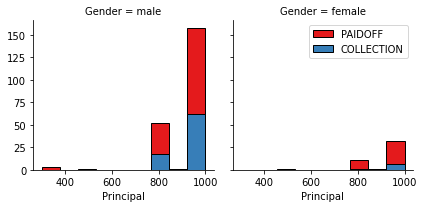

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

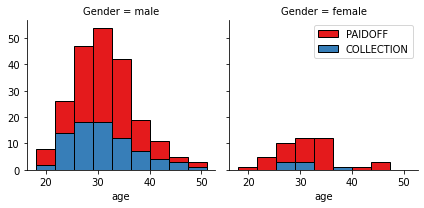

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

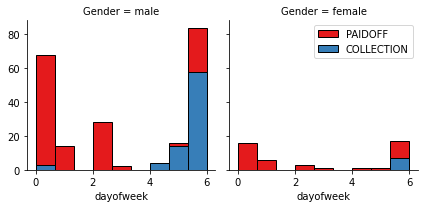

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [21]:
df.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

ks= range(1,10)
mean_accuracy=[]

for n in ks:
    knn_model=knn(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    knn_yhat=knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))

In [23]:
for i in range(0, len(mean_accuracy)):
    print("k= {} has a Score = {}".format(i+1, mean_accuracy[i]))

k= 1 has a Score = 0.6714285714285714
k= 2 has a Score = 0.6571428571428571
k= 3 has a Score = 0.7142857142857143
k= 4 has a Score = 0.6857142857142857
k= 5 has a Score = 0.7571428571428571
k= 6 has a Score = 0.7142857142857143
k= 7 has a Score = 0.7857142857142857
k= 8 has a Score = 0.7571428571428571
k= 9 has a Score = 0.7571428571428571


Text(0, 0.5, 'Testing Accuracy Values')

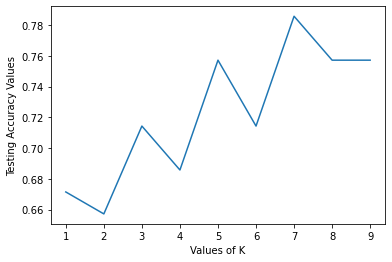

In [24]:
plt.plot(ks,mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

In [25]:
knn_model=knn(n_neighbors=7)
knn_model.fit(X_train, y_train)
knn_yhat=knn_model.predict(X_test)

knn_model

KNeighborsClassifier(n_neighbors=7)

# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [97]:
depth_range= range(1, 10)
jaccard_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion='gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    print("For depth ={} the accuracy score is {}".format(d, accuracy_score(y_test, dt_yhat)))
    jaccard_score_.append(jaccard_score(y_test, dt_yhat, pos_label = "PAIDOFF"))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

For depth =1 the accuracy score is 0.7857142857142857
For depth =2 the accuracy score is 0.7857142857142857
For depth =3 the accuracy score is 0.6142857142857143
For depth =4 the accuracy score is 0.6142857142857143
For depth =5 the accuracy score is 0.6285714285714286
For depth =6 the accuracy score is 0.7714285714285715
For depth =7 the accuracy score is 0.7571428571428571
For depth =8 the accuracy score is 0.7285714285714285
For depth =9 the accuracy score is 0.6428571428571429


In [84]:
result= pd.DataFrame([jaccard_score_ , f1_score_], index=['Jaccard','F1'], columns=['d = 1','d = 2', 'd = 3', 'd = 4', 'd = 5', 'd = 6', 'd = 7', 'd = 8', 'd = 9'])
result.columns.name = 'Evaluation Metrices'
result

Evaluation Metrices,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
Jaccard,0.000000,0.000000,0.205882,0.205882,0.235294,0.111111,0.105263,0.136364,0.242424
F1,0.691429,0.691429,0.644599,0.644599,0.658892,0.723810,0.714286,0.707329,0.670925


In [90]:
dt_model= DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [96]:
print("Train Set Jaccard Accuracy: ",jaccard_score(y_train, dt_model.predict(X_train), pos_label = "PAIDOFF"))
print("Test Set Jaccard Accuracy: ",jaccard_score(y_test, dt_model.predict(X_test), pos_label = "PAIDOFF"))
print("Train Set F1 Accuracy: ",f1_score(y_train, dt_model.predict(X_train),average='weighted'))
print("Test Set F1 Accuracy: ",f1_score(y_test, dt_model.predict(X_test),average='weighted'))

Train Set Jaccard Accuracy:  0.7427536231884058
Test Set Jaccard Accuracy:  0.7857142857142857
Train Set F1 Accuracy:  0.6331163939859591
Test Set F1 Accuracy:  0.6914285714285714


# Support Vector Machine

In [114]:
from sklearn import svm
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

In [100]:
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    svm_model= svm.SVC( kernel = k).fit(X_train, y_train)
    svm_yhat=svm_model.predict(X_test)
    print("For Kernel: {}, the f1 score is: {}".format(k, f1_score(y_test, svm_yhat, average='weighted')))

For Kernel: linear, the f1 score is: 0.6914285714285714
For Kernel: poly, the f1 score is: 0.7064793130366899
For Kernel: rbf, the f1 score is: 0.7275882012724117
For Kernel: sigmoid, the f1 score is: 0.6892857142857144


In [105]:
    accuracy_score= []
    
    svc_model= svm.SVC(C=0.01, gamma='auto', kernel=k)
    svc_model.fit(X_train, y_train)
    svm_yhat=svm_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, svm_yhat, average= 'weighted'))

Text(0, 0.5, 'Accuracy')

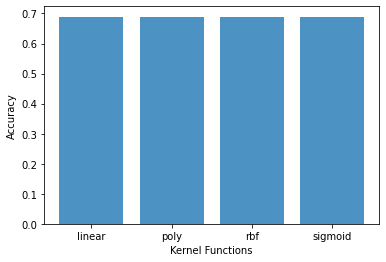

In [116]:
kernel_func=['linear', 'poly', 'rbf', 'sigmoid']

y_pos= np.arange(len(kernel_func))
plt.bar(y_pos, accuracy_score, align='center', alpha=0.8)
plt.xticks(y_pos, kernel_func)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')

In [118]:
from sklearn.svm import SVC

In [119]:
svc_model = SVC(C=0.01, gamma='auto', kernel= 'poly')
svc_model.fit(X_train, y_train)
svc_model

SVC(C=0.01, gamma='auto', kernel='poly')

In [120]:
best_svm=svm.SVC(kernel='rbf').fit(X_train, y_train)
best_svm

SVC()

In [123]:
print("Train Set Jaccard Accuracy: ",jaccard_score(y_train, best_svm.predict(X_train), pos_label = "PAIDOFF"))
print("Test Set Jaccard Accuracy: ",jaccard_score(y_test, best_svm.predict(X_test), pos_label = "PAIDOFF"))
print("Train Set F1 Accuracy: ",f1_score(y_train, best_svm.predict(X_train),average='weighted'))
print("Test Set F1 Accuracy: ",f1_score(y_test, best_svm.predict(X_test),average='weighted'))

Train Set Jaccard Accuracy:  0.7560975609756098
Test Set Jaccard Accuracy:  0.7272727272727273
Train Set F1 Accuracy:  0.7682165861513688
Test Set F1 Accuracy:  0.7275882012724117


# Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
%matplotlib inline 
import matplotlib.pyplot as plt

In [131]:
solvers= ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val=[0.1, 0.01, 0.001]
index=[]
accuracy_score=[]
iterations=0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2*5)
        iterations +=1
        lr_model= LogisticRegression(C=c,solver=solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.4827539604894662
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.4827460761391961
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.4981902487744225
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.48275353245267294
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.4827572965883259
Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.4920179847937498
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.49201806978420703
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.5772287609479654
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.4920178014679269
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.49200403945951326
Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.5181766145124602
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.5181776451007731
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.670867975563743
Test 14: Accuracy at C = 0.001 whe

Text(0, 0.5, 'Testing Accuracy')

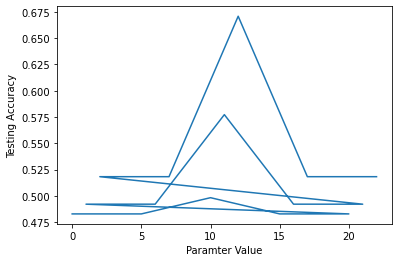

In [132]:
lr_prob= lr_model.predict_proba(X_test)
log_loss(y_test,lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Paramter Value')
plt.ylabel('Testing Accuracy')

In [137]:
lr_model= LogisticRegression(C=0.01, solver= 'liblinear')
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.01, solver='liblinear')

In [138]:
print("Train Set Jaccard Accuracy: ",jaccard_score(y_train, lr_model.predict(X_train), pos_label = "PAIDOFF"))
print("Test Set Jaccard Accuracy: ",jaccard_score(y_test, lr_model.predict(X_test), pos_label = "PAIDOFF"))
print("Train Set F1 Accuracy: ",f1_score(y_train, lr_model.predict(X_train),average='weighted'))
print("Test Set F1 Accuracy: ",f1_score(y_test, lr_model.predict(X_test),average='weighted'))

Train Set Jaccard Accuracy:  0.7351778656126482
Test Set Jaccard Accuracy:  0.6764705882352942
Train Set F1 Accuracy:  0.7341146337750953
Test Set F1 Accuracy:  0.6670522459996144


# Model Evaluation using Test set

In [157]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [158]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-12-13 17:04:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-12-13 17:04:05 (59.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [159]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [160]:
test_df['due_date']=pd.to_datetime(test_df['due_date'])
test_df['effective_date']=pd.to_datetime(test_df['effective_date'])
test_df['dayofweek']=test_df['effective_date'].dt.dayofweek

test_df['weekend']=test_df['dayofweek'].apply(lambda x:1 if (x>3) else 0)

test_df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)

Feature1 = test_df[['Principal', 'terms', 'age', 'Gender', 'weekend']]
Feature1 = pd.concat([Feature1, pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis=1, inplace=True)

x_loan_test= Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)
y_loan_test = test_df['loan_status'].values

In [161]:
knn_yhat=  knn_model.predict(x_loan_test)
jacc1= round(jaccard_score(y_loan_test, knn_yhat, pos_label = "PAIDOFF"),2)

dt_yhat= dt_model.predict(x_loan_test)
jacc2= round(jaccard_score(y_loan_test, dt_yhat, pos_label = "PAIDOFF"),2)

svm_yhat= best_svm.predict(x_loan_test)
jacc3= round(jaccard_score(y_loan_test, svm_yhat, pos_label = "PAIDOFF"),2)

lr_yhat= lr_model.predict(x_loan_test)
jacc4= round(jaccard_score(y_loan_test, lr_yhat, pos_label = "PAIDOFF"),2)

jss=[jacc1, jacc2, jacc3, jacc4]

jss

[0.65, 0.74, 0.78, 0.74]

In [168]:
knn_yhat=  knn_model.predict(x_loan_test)
f1= round(f1_score(y_loan_test, knn_yhat, average= 'weighted'),2)

dt_yhat= dt_model.predict(x_loan_test)
f2= round(f1_score(y_loan_test, dt_yhat, average= 'weighted'),2)

svm_yhat= best_svm.predict(x_loan_test)
f3= round(f1_score(y_loan_test, svm_yhat, average= 'weighted'),2)

lr_yhat= lr_model.predict(x_loan_test)
f4= round(f1_score(y_loan_test, lr_yhat, average= 'weighted'),2)

f1_list=[f1,f2,f3,f4]

f1_list

[0.63, 0.63, 0.76, 0.66]

In [164]:
lr_prob= lr_model.predict_proba(x_loan_test)
ll_list=['NA','NA','NA',round(log_loss(y_loan_test, lr_prob),2)]
ll_list

['NA', 'NA', 'NA', 0.57]

In [169]:
columns = ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression']
index=['Jaccard', 'F1-score','LogLoss']

accuracy_df=pd.DataFrame([jss,f1_list, ll_list], index=index, columns= columns)
accuracy_df1= accuracy_df.transpose()
accuracy_df1.columns.name='Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.65,0.63,NA
Decision Tree,0.74,0.63,NA
SVM,0.78,0.76,NA
LogisticRegression,0.74,0.66,0.57


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>